In [1]:

# modeification of ex1-10 for ex11
import numpy as np
from scipy.constants import speed_of_light
from scipy.integrate import quad
import scipy as sp
import matplotlib.pyplot as plt

c = speed_of_light

xi_knot = 1
p = 1


def frequency_spaceing(lower, upper, n):
    '''Generates a 1D array of equally spaced frequency values (in Hz)
    
    Args:
    lower = lower bound frequency for array (inclusive)
    upper = upper bound frequency for arary (inclusive)
    n = number of samples in the array
    
    Returns:
    frequency_array = a 1D array of equally spaced frequency values (in Hz)'''
    
    frequency_array = np.linspace(lower, upper, n)
    
    return frequency_array

def bandwidth(f_array):
    '''Returns bandwidth per channel of a frequency array'''
    
    ban = f_array[1] - f_array[0]
    
    return ban

def half_max(f, ban):
    '''Finds the magnitude of faraday depth for intensity to drop to half
    
    Args: 
    f = channel center frequency (in Hz)
    ban = bandwidth (in Hz)
    
    Returns:
    Float of the faraday depth value of half max'''
    
    fa = (f - 0.5 * ban)**2
    fb = (f + 0.5 * ban)**2
    
    xi_knot = 1
    p = 1
    
    predicted = int(round(np.abs(np.sqrt(3) / (c**2 *((1/fa) - (1/fb))))))
    
    margin = int(round((ban / 2)))
    
    phi = np.linspace(predicted - margin , predicted + margin, int(0.5 *round(predicted)))
    num_pol = 1 * phi
    
    n = len(phi)
    epsilon = 0.005
    for i in range(n):
        num_pol[i] = np.abs((bandwidth_avg_polarization(f, ban, phi[i], xi_knot, p)))
        if np.abs(num_pol[i] - 0.50) < epsilon:
            half_max = phi[i]
    return half_max

def bandwidth_avg_polarization(f, ban, phi, xi_knot, p):
    '''Computes the bandwidth averaged complex polarization of a single frequency channel
    
    Args:
    f = channel center frequency (in Hz)
    ban = bandwidth (in Hz)
    phi =  faraday depth value (in rad/m2)
    xi_knot = initial polarization angle (in rad)
    p = polarized intensity 
    
    Returns:
    avg_p_tilda = the average complex polarization, for the bandwidth, real is Q, imaginary is U
    '''
    a = f - (ban / 2)
    b = f + (ban / 2) # integral start and stop values
    
    x = f
    
    def func_n1(x, phi, xi_knot, p):
        return  np.real(p * np.exp(2.0j *(xi_knot + (c / x)**2 * phi ))) # integrand
    
    def func_n2(x, phi, xi_knot, p):
        return np.imag(p * np.exp(2.0j *(xi_knot + (c / x)**2 * phi )))
    
    i1 = quad(func_n1, a, b, args=(phi, xi_knot, p))[0] # integral
    
    i2 = quad(func_n2, a, b, args=(phi, xi_knot, p))[0]
    
    i = i1 + 1.0j*i2
    
    avg_p_tilda = i / ban # mean value thm
    
    return avg_p_tilda

def bandwidth_avg_array(f, phi, xi_knot, p):
    ''' computes the bandwidth averaged polarization for an array of channels

    Args:
    f = a 1D array of equally spaced frequency values (in Hz)
    phi =  faraday depth value (in rad/m2)
    xi_knot = initial polarization angle (in rad)
    p = polarized intensity
    
    Returns:
    avg_p_tilda = an array of the average complex polarization for each channel, real is Q, imaginary is U
    '''
    avg_p_tilda = 1.0j * f
    ban = bandwidth(f)
    n = len(f)
    for i in range(n): 
        avg_p_tilda[i] = bandwidth_avg_polarization(f[i], ban, phi, xi_knot, p)
    #
    
    return avg_p_tilda

def plot_stokes_intensity_angle(f, phi, xi_knot, p):
    '''Plots stokes Q and U, polarized intensity and polarized angle
    
    Args:
    f = an array of frequency values (in Hz)
    phi =  faraday depth value (in rad/m2)
    xi_knot = initial polarization angle (in rad)
    p = polarized intensity
    
    Returns:
    3 plots'''
    
    # plot 1 stokes q/u seperatly on y axis, freq on x
    p_tilda = bandwidth_avg_array(f, phi, xi_knot, p)
    
    q = np.real(p_tilda)
    u = np.imag(p_tilda)
    
    plt.figure()
    plt.plot(f, q, label='Stokes Q')
    plt.plot(f, u, label='Stokes U')
    plt.xlabel('Frequency')
    plt.ylabel('Intensity')
    plt.title('Stokes Q & U')
    plt.legend()
    plt.savefig('better_stokes_sim.pdf', dpi=400)
    plt.show()
    
    # plot 2 polarized intensity on y, freq on x
    
    p = np.abs(p_tilda)
    
    plt.figure()
    plt.plot(f, p, label='Polarized Intensity')
    plt.xlabel('Frequency')
    plt.ylabel('Intensity')
    plt.title('Polarized Intensity')
    plt.legend()
    plt.savefig('polarized_intensisty_sim.pdf', dpi=400)
    plt.show()
   
    return

def high_plot_bandwidth_depolarization(f, ban):
    '''Plots the polarized intensity for the channel as a function of increasing faraday depth
    
    Args: 
    f = channel center frequency (in Hz)
    ban = bandwidth (in Hz)
    
    Returns:
    Plot of the polarized intensity as a function of increasing faraday depth'''
    
    #analytic
    
    #phi = np.linspace(0, 30000, 30000)
    
   # num_pol = 1 * phi
   
    fa = (f - 0.5 * ban)**2
    fb = (f + 0.5 * ban)**2
    
    xi_knot = 1
    p = 1
    
    predicted_phi = np.abs(np.sqrt(3) / (c**2 *((1/fa) - (1/fb))))
    
    phi = np.linspace(-10 * int(round(predicted_phi)), 10 *int(round(predicted_phi)), int(0.5 *round(predicted_phi)))
    num_pol = 1 * phi
    
    epsilon = 0.005
    n = len(phi)
    for i in range(n):
        num_pol[i] = np.abs((bandwidth_avg_polarization(f, ban, phi[i], xi_knot, p)))
        if np.abs(num_pol[i] - 0.50) < epsilon:
            half_max = np.abs(phi[i])
    
    plt.figure()
    plt.plot(phi, num_pol,'b')
    #plt.plot(phi, an_pol,'r',label='Analytical')
    plt.xlabel('Faraday Depth')
    plt.ylabel('Fractional Intensity')
    plt.vlines(half_max, 0, 1.0, colors='purple', linestyles='dashed', label='Faraday Depth of Half Max')
    plt.vlines(-half_max, 0, 1.0, colors='purple', linestyles='dashed',)
    plt.hlines(0.5, -10 * int(round(predicted_phi)), 10 * int(round(predicted_phi)), colors='black', linestyles='dashed', label='Half max')
    plt.title('Highest Frequency Bandwidth Depolarization')
    #plt.legend('upper left')
    plt.savefig('high_bandwidth_depolarization_sim.pdf', dpi=400)
    plt.show()
    
    return 

def low_plot_bandwidth_depolarization(f, ban):
    '''Plots the polarized intensity for the channel as a function of increasing faraday depth
    
    Args: 
    f = channel center frequency (in Hz)
    ban = bandwidth (in Hz)
    
    Returns:
    Plot of the polarized intensity as a function of increasing faraday depth'''
    
    #analytic
    
    #phi = np.linspace(0, 30000, 30000)
    
   # num_pol = 1 * phi
   
    fa = (f - 0.5 * ban)**2
    fb = (f + 0.5 * ban)**2
    
    xi_knot = 1
    p = 1
    
    predicted_phi = np.abs(np.sqrt(3) / (c**2 *((1/fa) - (1/fb))))
    
    phi = np.linspace(-10 * int(round(predicted_phi)), 10 *int(round(predicted_phi)), int(0.5 *round(predicted_phi)))
    num_pol = 1 * phi
    
    epsilon = 0.005
    n = len(phi)
    for i in range(n):
        num_pol[i] = np.abs((bandwidth_avg_polarization(f, ban, phi[i], xi_knot, p)))
        if np.abs(num_pol[i] - 0.50) < epsilon:
            half_max = np.abs(phi[i])
    
    plt.figure()
    plt.plot(phi, num_pol,'b')
    #plt.plot(phi, an_pol,'r',label='Analytical')
    plt.xlabel('Faraday Depth')
    plt.ylabel('Fractional Intensity')
    plt.vlines(half_max, 0, 1.0, colors='purple', linestyles='dashed', label='Faraday Depth of Half Max')
    plt.vlines(-half_max, 0, 1.0, colors='purple', linestyles='dashed',)
    plt.hlines(0.5, -10 * int(round(predicted_phi)), 10 * int(round(predicted_phi)), colors='black', linestyles='dashed', label='Half max')
    plt.title('Lowest Highest Frequency Bandwidth Depolarization')
    #plt.legend('upper left')
    plt.savefig('low_bandwidth_depolarization_sim.pdf', dpi=400)
    plt.show()
    
    return 

In [9]:

# modeification of ex1-10 for ex11
import numpy as np
from scipy.constants import speed_of_light
from scipy.integrate import quad
import scipy as sp
import matplotlib.pyplot as plt

c = speed_of_light

xi_knot = 1
p = 1


def frequency_spaceing(lower, upper, n):
    '''Generates a 1D array of equally spaced frequency values (in Hz)
    
    Args:
    lower = lower bound frequency for array (inclusive)
    upper = upper bound frequency for arary (inclusive)
    n = number of samples in the array
    
    Returns:
    frequency_array = a 1D array of equally spaced frequency values (in Hz)'''
    
    frequency_array = np.linspace(lower, upper, n)
    
    return frequency_array

def bandwidth(f_array):
    '''Returns bandwidth per channel of a frequency array'''
    
    ban = f_array[1] - f_array[0]
    
    return ban

def half_max(f, ban):
    '''Finds the magnitude of faraday depth for intensity to drop to half
    
    Args: 
    f = channel center frequency (in Hz)
    ban = bandwidth (in Hz)
    
    Returns:
    Float of the faraday depth value of half max'''
    
    fa = (f - 0.5 * ban)**2
    fb = (f + 0.5 * ban)**2
    
    xi_knot = 1
    p = 1
    
    predicted = int(round(np.abs(np.sqrt(3) / (c**2 *((1/fa) - (1/fb))))))
    
    margin = int(round((ban / 2)))
    
    phi = np.linspace(predicted - margin , predicted + margin, int(0.5 *round(predicted)))
    num_pol = 1 * phi
    
    n = len(phi)
    epsilon = 0.005
    for i in range(n):
        num_pol[i] = np.abs((bandwidth_avg_polarization(f, ban, phi[i], xi_knot, p)))
        if np.abs(num_pol[i] - 0.50) < epsilon:
            half_max = phi[i]
    return half_max

def bandwidth_avg_polarization(f, ban, phi, xi_knot, p):
    '''Computes the bandwidth averaged complex polarization of a single frequency channel
    
    Args:
    f = channel center frequency (in Hz)
    ban = bandwidth (in Hz)
    phi =  faraday depth value (in rad/m2)
    xi_knot = initial polarization angle (in rad)
    p = polarized intensity 
    
    Returns:
    avg_p_tilda = the average complex polarization, for the bandwidth, real is Q, imaginary is U
    '''
    a = f - (ban / 2)
    b = f + (ban / 2) # integral start and stop values
    
    x = f
    
    def func_n1(x, phi, xi_knot, p):
        return  np.real(p * np.exp(2.0j *(xi_knot + (c / x)**2 * phi ))) # integrand
    
    def func_n2(x, phi, xi_knot, p):
        return np.imag(p * np.exp(2.0j *(xi_knot + (c / x)**2 * phi )))
    
    i1 = quad(func_n1, a, b, args=(phi, xi_knot, p))[0] # integral
    
    i2 = quad(func_n2, a, b, args=(phi, xi_knot, p))[0]
    
    i = i1 + 1.0j*i2
    
    avg_p_tilda = i / ban # mean value thm
    
    return avg_p_tilda

def bandwidth_avg_array(f, phi, xi_knot, p):
    ''' computes the bandwidth averaged polarization for an array of channels

    Args:
    f = a 1D array of equally spaced frequency values (in Hz)
    phi =  faraday depth value (in rad/m2)
    xi_knot = initial polarization angle (in rad)
    p = polarized intensity
    
    Returns:
    avg_p_tilda = an array of the average complex polarization for each channel, real is Q, imaginary is U
    '''
    avg_p_tilda = 1.0j * f
    ban = bandwidth(f)
    n = len(f)
    for i in range(n): 
        avg_p_tilda[i] = bandwidth_avg_polarization(f[i], ban, phi, xi_knot, p)
    #
    
    return avg_p_tilda

def plot_stokes_intensity_angle(f, phi, xi_knot, p):
    '''Plots stokes Q and U, polarized intensity and polarized angle
    
    Args:
    f = an array of frequency values (in Hz)
    phi =  faraday depth value (in rad/m2)
    xi_knot = initial polarization angle (in rad)
    p = polarized intensity
    
    Returns:
    3 plots'''
    
    # plot 1 stokes q/u seperatly on y axis, freq on x
    p_tilda = bandwidth_avg_array(f, phi, xi_knot, p)
    
    q = np.real(p_tilda)
    u = np.imag(p_tilda)
    
    plt.figure()
    plt.plot(f, q, label='Stokes Q')
    plt.plot(f, u, label='Stokes U')
    plt.xlabel('Frequency')
    plt.ylabel('Intensity')
    plt.title('Stokes Q & U')
    plt.legend()
    plt.savefig('better_stokes_sim.pdf', dpi=400)
    plt.show()
    
    # plot 2 polarized intensity on y, freq on x
    
    p = np.abs(p_tilda)
    
    plt.figure()
    plt.plot(f, p, label='Polarized Intensity')
    plt.xlabel('Frequency')
    plt.ylabel('Intensity')
    plt.title('Polarized Intensity')
    plt.legend()
    plt.savefig('polarized_intensisty_sim.pdf', dpi=400)
    plt.show()
   
    return

def high_plot_bandwidth_depolarization_data(f, ban):
    '''Plots the polarized intensity for the channel as a function of increasing faraday depth
    
    Args: 
    f = channel center frequency (in Hz)
    ban = bandwidth (in Hz)
    
    Returns:
    Two arrays, x1 and y1 for plot a1'''
    
    #analytic
    
    #phi = np.linspace(0, 30000, 30000)
    
   # num_pol = 1 * phi
   
    fa = (f - 0.5 * ban)**2
    fb = (f + 0.5 * ban)**2
    
    xi_knot = 1
    p = 1
    
    predicted_phi = np.abs(np.sqrt(3) / (c**2 *((1/fa) - (1/fb))))
    
    phi = np.linspace(-10 * int(round(predicted_phi)), 10 *int(round(predicted_phi)), int(0.5 *round(predicted_phi)))
    num_pol = 1 * phi
    
    epsilon = 0.005
    n = len(phi)
    for i in range(n):
        num_pol[i] = np.abs((bandwidth_avg_polarization(f, ban, phi[i], xi_knot, p)))
        if np.abs(num_pol[i] - 0.50) < epsilon:
            half_max = np.abs(phi[i])
    
    return phi, num_pol, half_max, predicted_phi

def low_plot_bandwidth_depolarization_data(f, ban):
    '''Plots the polarized intensity for the channel as a function of increasing faraday depth
    
    Args: 
    f = channel center frequency (in Hz)
    ban = bandwidth (in Hz)
    
    Returns:
    Plot of the polarized intensity as a function of increasing faraday depth'''
    
    #analytic
    
    #phi = np.linspace(0, 30000, 30000)
    
   # num_pol = 1 * phi
   
    fa = (f - 0.5 * ban)**2
    fb = (f + 0.5 * ban)**2
    
    xi_knot = 1
    p = 1
    
    predicted_phi = np.abs(np.sqrt(3) / (c**2 *((1/fa) - (1/fb))))
    
    phi = np.linspace(-10 * int(round(predicted_phi)), 10 *int(round(predicted_phi)), int(0.5 *round(predicted_phi)))
    num_pol = 1 * phi
    
    epsilon = 0.005
    n = len(phi)
    for i in range(n):
        num_pol[i] = np.abs((bandwidth_avg_polarization(f, ban, phi[i], xi_knot, p)))
        if np.abs(num_pol[i] - 0.50) < epsilon:
            half_max = np.abs(phi[i])
    
    return phi, num_pol , half_max, predicted_phi

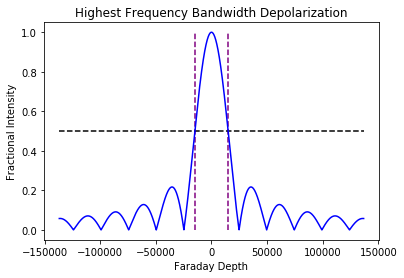

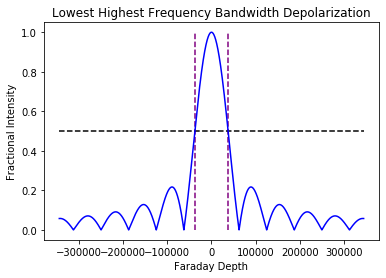

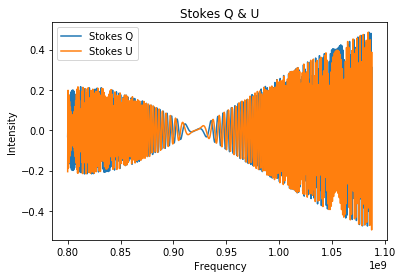

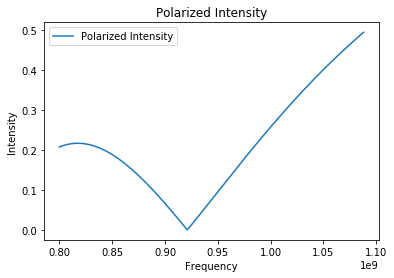

In [4]:

#import argparse
#parser = argparse.ArgumentParser()
#parser.add_argument("lower", help="lower bound frequency for array (inclusive)",
                    #type=int)
#parser.add_argument("upper", help="upper = upper bound frequency for arary (inclusive)",
                   # type=int)
#parser.add_argument("n", help="number of samples in the array",
                   # type=int)
#args = parser.parse_args()


#lower = args.lower
#upper = args.upper 
#n = args.n

f = frequency_spaceing(800000000, 1088000000, 800)

ban = bandwidth(f)
    

high = f[0]
low = f[-1]
phi = half_max(low, ban)
high_plot_bandwidth_depolarization(high, ban)
low_plot_bandwidth_depolarization(low, ban)
plot_stokes_intensity_angle(f, phi, xi_knot, p)

<function matplotlib.pyplot.show(*args, **kw)>

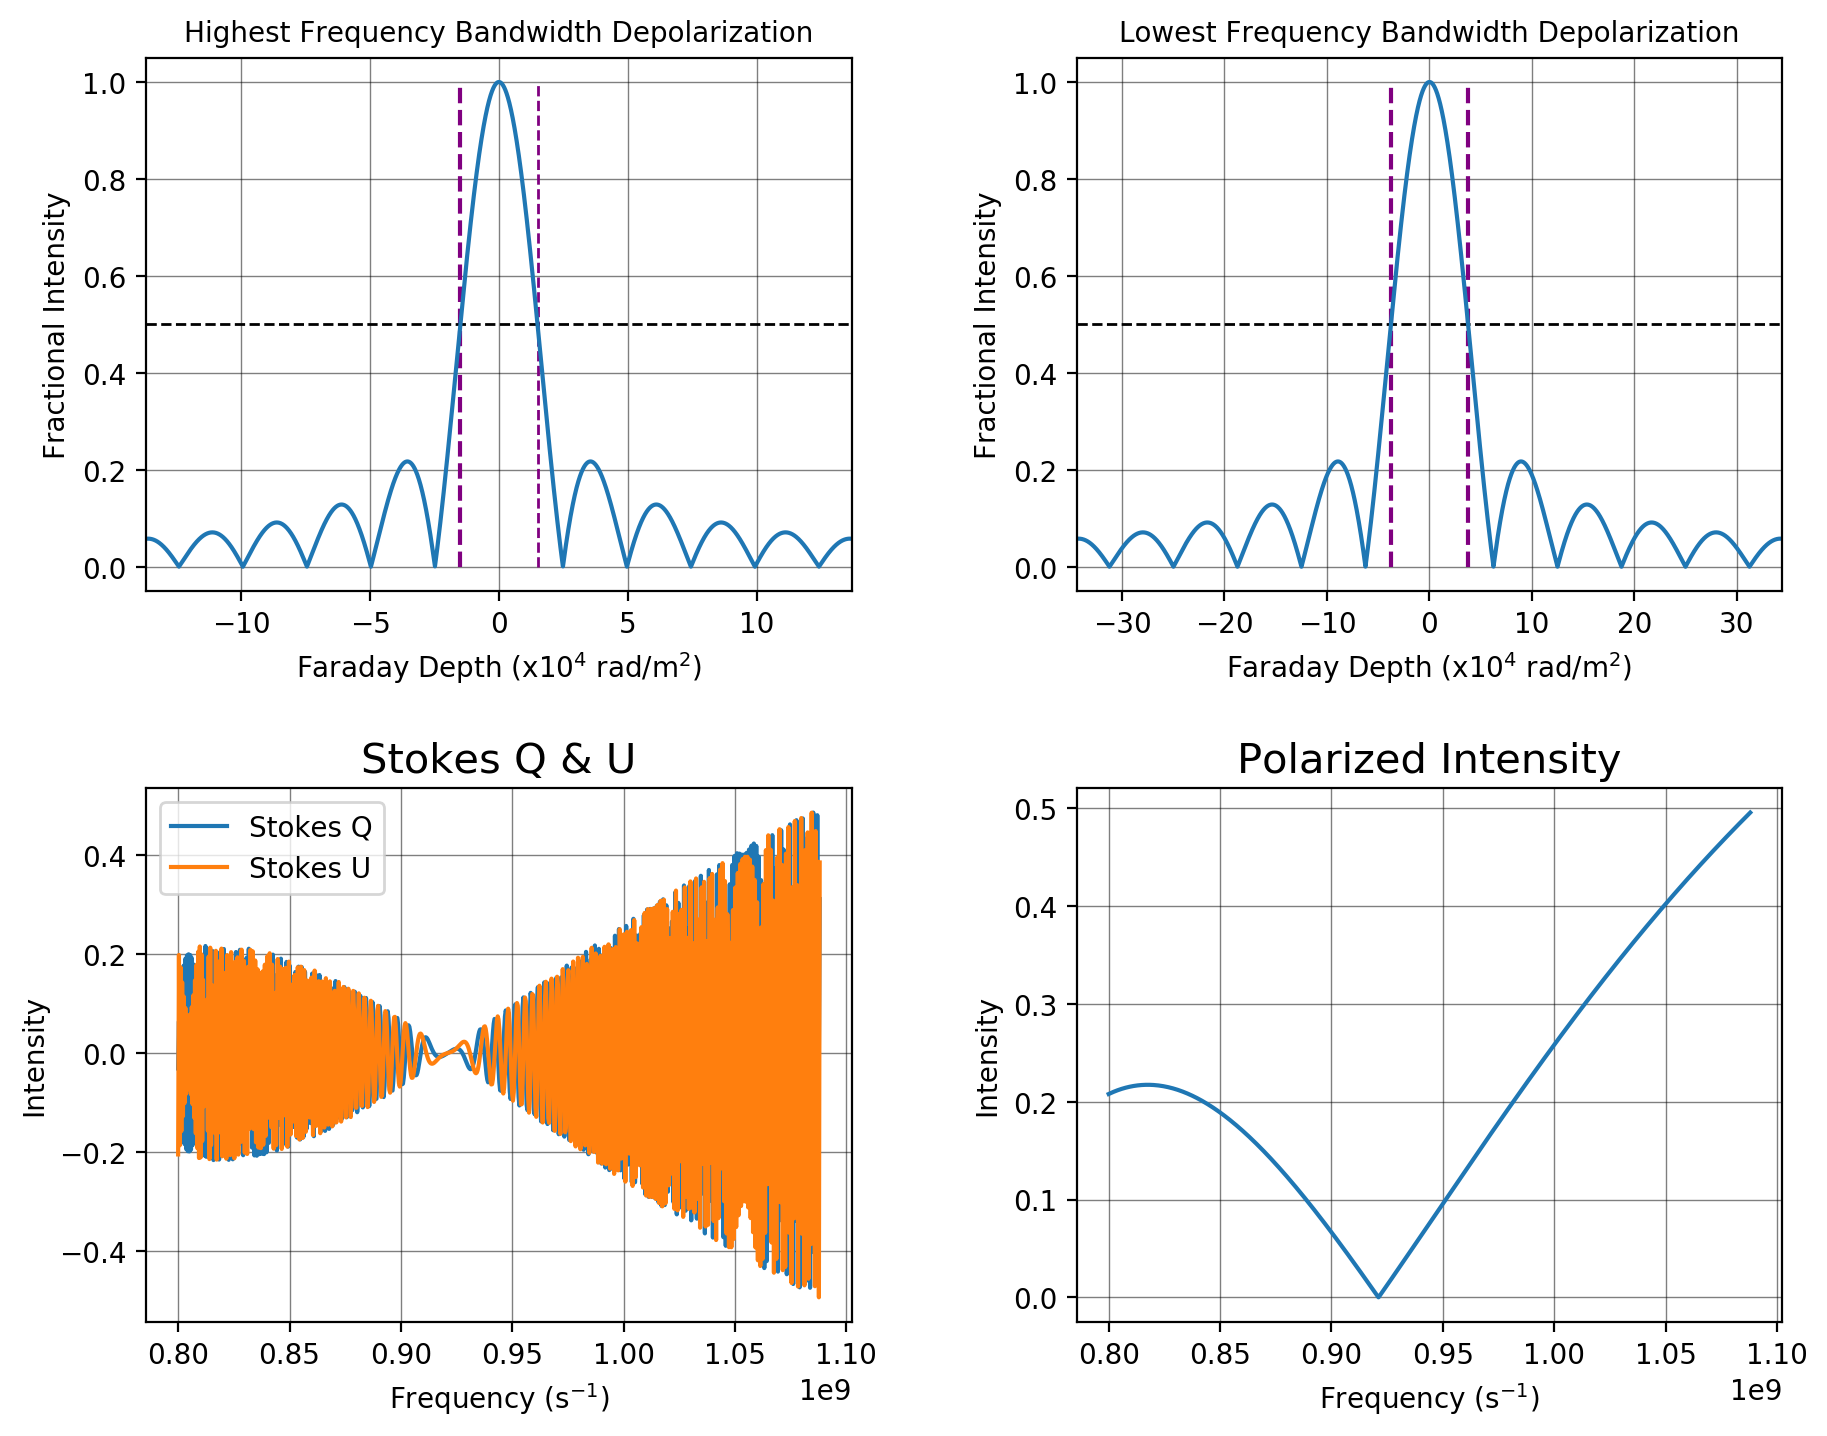

In [26]:
p = 1
xi_knot = 1

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(10,8), dpi=200)
fig.tight_layout(pad=5)
# Titles
ax1.set_title("Highest Frequency Bandwidth Depolarization", fontsize=10)
ax2.set_title("Lowest Frequency Bandwidth Depolarization", fontsize=10)
ax3.set_title("Stokes Q & U", fontsize=15)
ax4.set_title("Polarized Intensity", fontsize=15)
#data
# a1 = highest
x1a, y1, half1, predicted_phi1 = high_plot_bandwidth_depolarization_data(high, ban)
x1 = x1a * (10 **-4)
# a2 = lowest
x2a, y2 , half2, predicted_phi2 = low_plot_bandwidth_depolarization_data(low, ban)
x2 = x2a * (10 **-4)
# a3 = stokes
p_tilda = bandwidth_avg_array(f, phi, xi_knot, p)
    
y3a = np.real(p_tilda)
y3b = np.imag(p_tilda)
x3 = f
# a4 = Polarized Intensity
y4 = np.abs(p_tilda)
x4 = f

# axis limits
ax1.set_xlim(-(10**-3) *int(round(predicted_phi1)), (10**-3) *int(round(predicted_phi1)))
ax2.set_xlim(-(10**-3) *int(round(predicted_phi2)), (10**-3) *int(round(predicted_phi2)))
#lines
ax1.vlines((10**-4)*half1, 0, 1.0, colors='purple', linestyles='dashed', label='Faraday Depth of Half Max', lw=0.5)
ax1.vlines(-(10**-4)*half1, 0, 1.0, colors='purple', linestyles='dashed',lw=0.5)
ax1.hlines(0.5, -(10**-3) *int(round(predicted_phi1)), (10**-3) *int(round(predicted_phi1)), colors='black', linestyles='dashed', label='Half max',lw=0.5)
ax2.vlines((10**-4)*half2, 0, 1.0, colors='purple', linestyles='dashed', label='Faraday Depth of Half Max', lw=0.5)
ax2.vlines(-(10**-4)*half2, 0, 1.0, colors='purple', linestyles='dashed',lw=0.5)
ax2.hlines(0.5, -(10**-3) *int(round(predicted_phi2)), (10**-3) *int(round(predicted_phi2)), colors='black', linestyles='dashed', label='Half max',lw=0.5)

# Axis Labels
ax1.set_xlabel("Faraday Depth (x$10^4$ rad/m$^2$)", fontsize=10)
ax1.set_ylabel("Fractional Intensity", fontsize=10)
ax2.set_xlabel("Faraday Depth (x$10^4$ rad/m$^2$)", fontsize=10)
ax2.set_ylabel("Fractional Intensity", fontsize=10)
ax3.set_xlabel("Frequency (s$^{-1}$)", fontsize=10)
ax3.set_ylabel("Intensity", fontsize=10)
ax4.set_xlabel("Frequency (s$^{-1}$)", fontsize=10)
ax4.set_ylabel("Intensity", fontsize=10)
# Plot Data
ax1.plot(x1, y1)
ax2.plot(x2, y2)
ax3.plot(x3, y3a, label='Stokes Q')
ax3.plot(x3,y3b, label='Stokes U')
ax4.plot(x4, y4) # Whatever yoy gotta do, man
# Legend
#ax1.legend() #Delete any that a legend is unneccesary for
#ax2.legend()
ax3.legend()
#ax4.legend() 
# Gridlines
ax1.grid(True, color='black', alpha=0.5, lw=0.5)
ax2.grid(True, color='black', alpha=0.5, lw=0.5)
ax3.grid(True, color='black', alpha=0.5, lw=0.5)
ax4.grid(True, color='black', alpha=0.5, lw=0.5)
# Export to a .pdf
fig.savefig("rm_simulator.pdf", dpi=200)
plt.show